# hrc-i expmap

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download


In [2]:
/bin/rm -rf 6202
download_chandra_obsid 6202 


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       64 Mb  ####################          < 1 s  67975.7 kb/s
  evt2     fits       40 Mb  ####################          < 1 s  55176.1 kb/s
  vvref    pdf        35 Mb  ####################          < 1 s  75289.5 kb/s
  asol     fits        4 Mb  ####################          < 1 s  39781.4 kb/s
  mtl      fits        3 Mb  ####################          < 1 s  36940.6 kb/s
  osol     fits      369 Kb  ####################          < 1 s  14975.2 kb/s
  osol     fits      362 Kb  ####################          < 1 s  16858.6 kb/s
  osol     fits      355 Kb  ####################          < 1 s  12731.0 kb/s
  aqual    fits      285 Kb  ####################          < 1 s  14369.3 kb/s
  eph1     fits      282 Kb  ####################          < 1 s  14798.1 kb/s
  eph1     fits      275 Kb  ####################    

In [3]:
/bin/rm -rf repro
chandra_repro 6202 out=`pwd`/repro


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/expmap_hrci/6202'

No boresight correction update to asol file is needed.

Running hrc_build_badpix to create new bad pixel file...

Running hrc_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file on grade and status...
Applying the good time intervals from the flt1.fits file...

Running hrc_dtfstats to recompute the average dead time corrections...
The new level=2 event file is: /proj/sds/Staff/kjg/Threads/expmap_hrci/repro/hrcf06202_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/expmap_hrci/repro/hrcf06202_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new produ

## Run `fluximage`

In [4]:
fluximage repro/ m31 bands=::1.1 bin=8 \
    xygrid=13176.5:20248.5:8,13240.5:18584.5:8 clob+

Running fluximage
Version: 23 February 2021

Found repro/hrcf06202_repro_evt2.fits
Using event file repro/hrcf06202_repro_evt2.fits
Using PI=: with a monochromatic energy of 1.1 keV.
Aspect solution repro/pcadf06202_001N001_asol1.fits found.
Bad-pixel file repro/hrcf06202_repro_bpix1.fits found.
Mask file repro/hrcf06202_001N006_msk1.fits found.
Dtf file repro/hrcf06202_001N006_dtf1.fits found.
Background file for repro/hrcf06202_repro_evt2.fits found: /export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/bkgrnd/hrciD2005-01-01bkgrndN0002.fits

The output images will have 884 by 668 pixels,
    and cover x=13176.5:20248.5:8,y=13240.5:18584.5:8.

Running tasks in parallel with 4 processors.
Creating aspect histogram for obsid 6202
# asphist (CIAO 4.14): WARNING: skipping 489 livetime correction records (from time: 223263168.067467 to time: 223264168.467512)


Creating instrument map for obsid 6202
Setting up the HRC-I background for obsid 6202
# dmhistory (CIAO 4.14): WA

In [5]:
dmhistory m31_all_flux.img fluximage

fluximage infile="repro/" outroot="m31" bands="::1.1" xygrid="13176.5:20248.5:8,13240.5:18584.5:8" binsize="INDEF" asolfile="" badpixfile="" maskfile="" dtffile="" units="default" expmapthresh="1.5%" background="default" bkgparams="[pi=300:500]" psfecf="INDEF" random="0" parallel="yes" nproc="INDEF" tmpdir="./" cleanup="yes" clobber="yes" verbose="1" 



---
## Step By Step

In [6]:
dmcopy "repro/hrcf06202_repro_evt2.fits[sky=box(16712.5,15912.5,7072,5344)][bin sky=::8]" img.bin8 clob+

In [7]:
get_sky_limits img.bin8

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: img.bin8
  Image has 884 x 668 pixels
  Pixel size is 8.0 by 8.0
  Lower left (0.5,0.5) corner is x,y= 13176.5, 13240.5
  Upper right (884.5,668.5) corner is x,y= 20248.5, 18584.5
  DM filter is:
    x=13176.5:20248.5:#884,y=13240.5:18584.5:#668
  mkexpmap xygrid value is:
    13176.5:20248.5:#884,13240.5:18584.5:#668


### Subtract background


In [8]:
hrc_bkgrnd_lookup repro/hrcf06202_repro_evt2.fits event

/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/bkgrnd/hrciD2005-01-01bkgrndN0002.fits


In [9]:
dmcopy "$CALDB/data/chandra/hrc/bkgrnd/hrciD2005-01-01bkgrndN0002.fits[bin x=13176.5:20248.5:#884,y=13240.5:18584.5:#668]" bgimg.bin8 clob+

In [10]:
dmimgcalc img.bin8,bgimg.bin8 none \
      bgsub.bin8 \
      op="imgout=img1-((img1_exposure/img2_exposure)*img2)" clob+

BTIMDRFT not present in all input files...FAIL...
BTIMNULL not present in all input files...FAIL...
BTIMRATE not present in all input files...FAIL...
omit - DEC_NOM values different more than 0.000300
omit - DEC_PNT values different more than 0.000300
omit - FOC_LEN values different more than 1.000000
OBI_NUM values are different...FAIL...
omit - RA_NOM values different more than 0.000300
omit - RA_PNT values different more than 0.000300
omit - ROLL_NOM values different more than 1.000000
omit - ROLL_PNT values different more than 1.000000
omit - SIM_X values different more than 0.001000
omit - SIM_Z values different more than 0.100000


### Create aspect histogram

In [11]:
cat repro/hrcf06202_asol1.lis

/proj/sds/Staff/kjg/Threads/expmap_hrci/6202/primary/pcadf06202_001N001_asol1.fits


In [12]:
pset asphist infile=@-repro/hrcf06202_asol1.lis
pset asphist evtfile=repro/hrcf06202_repro_evt2.fits
pset asphist dtffile=repro/hrcf06202_001N006_dtf1.fits
pset asphist outfile=asphist.fits
asphist mode=h clob+

# asphist (CIAO 4.14): WARNING: skipping 489 livetime correction records (from time: 223263168.067467 to time: 223264168.467512)




### Instmap

In [13]:
pset mkinstmap obsfile=repro/hrcf06202_repro_evt2.fits
pset mkinstmap detsubsys=HRC-I
pset mkinstmap pixelgrid="1:16384:8,1:16384:8"
pset mkinstmap outfile=instmap.img
pset mkinstmap spectrum=NONE monoenergy=1.1
mkinstmap mode=h clob+

### Expmap

In [14]:
get_sky_limits bgsub.bin8

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: bgsub.bin8
  Image has 884 x 668 pixels
  Pixel size is 8.0 by 8.0
  Lower left (0.5,0.5) corner is x,y= 13176.5, 13240.5
  Upper right (884.5,668.5) corner is x,y= 20248.5, 18584.5
  DM filter is:
    x=13176.5:20248.5:#884,y=13240.5:18584.5:#668
  mkexpmap xygrid value is:
    13176.5:20248.5:#884,13240.5:18584.5:#668


In [15]:
pset mkexpmap xygrid=")get_sky_limits.xygrid"
pset mkexpmap normalize=no
pset mkexpmap asphistfile=asphist.fits 
pset mkexpmap instmapfile=instmap.img
pset mkexpmap outfile=expmap.img 
mkexpmap mode=h clob+

[1] 23276
[1]+  Done                    ds9 expmap.img -scale log -cmap a -zoom 0.5 -saveimage png expmap.png


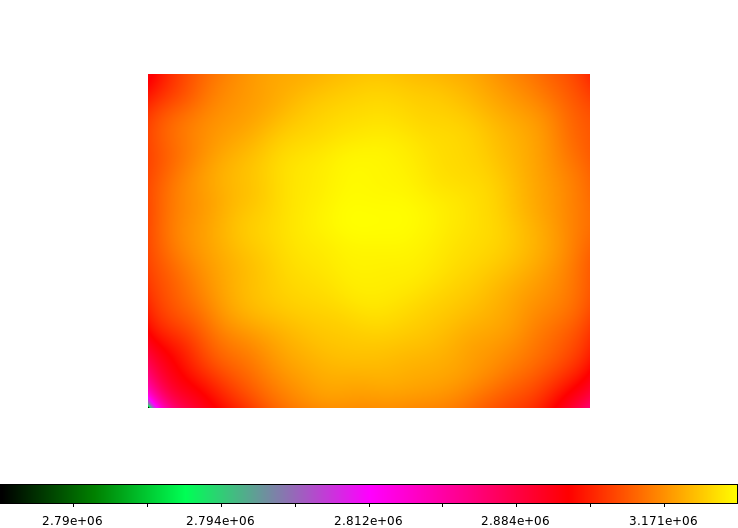

In [16]:
ds9 expmap.img -scale log -cmap a -zoom 0.5 -saveimage png expmap.png &
sleep 10
xpaset -p ds9 quit

display < expmap.png

### Normalize counts by expmap

#### Threshold

In [17]:
dmimgthresh bgsub.bin8 bgsub.thresh.bin8 expfile=expmap.img cut=1.5% clob+
dmimgthresh expmap.img expmap.thresh.img  cut=1.5% clob+

#### Subtract

In [18]:
dmimgcalc bgsub.thresh.bin8 expmap.thresh.img norm.img div clob+

BTIMDRFT not present in all input files...FAIL...
BTIMNULL not present in all input files...FAIL...
BTIMRATE not present in all input files...FAIL...
omit - keyword DEC_NOM not present in all input files
omit - keyword DEC_PNT not present in all input files
omit - keyword FOC_LEN not present in all input files
OBI_NUM not present in all input files...FAIL...
omit - keyword RA_NOM not present in all input files
omit - keyword RA_PNT not present in all input files
omit - keyword ROLL_NOM not present in all input files
omit - keyword ROLL_PNT not present in all input files
omit - keyword SIM_X not present in all input files
omit - keyword SIM_Z not present in all input files


## Calc source flux

In [19]:
cat << EOM > core.reg
# Region file format: CIAO version 1.0
circle(16822.2,16447.4,120)
EOM

In [20]:
dmstat "m31_all_flux.img[sky=region(core.reg)]" centroid=no | grep sum

    sum:	0.00143972889 


In [21]:
dmextract "m31_all_flux.img[bin sky=@core.reg]" source.flux opt=generic clob+
dmlist "source.flux[cols counts]" data,clean

#  COUNTS
     0.00143972889004


## Rings


In [22]:
punlearn fluximage
fluximage repro rings/ background=none bands=::1.1 clob+

Running fluximage
Version: 23 February 2021

Found repro/hrcf06202_repro_evt2.fits
Using event file repro/hrcf06202_repro_evt2.fits
Using PI=: with a monochromatic energy of 1.1 keV.
Aspect solution repro/pcadf06202_001N001_asol1.fits found.
Bad-pixel file repro/hrcf06202_repro_bpix1.fits found.
Mask file repro/hrcf06202_001N006_msk1.fits found.
Dtf file repro/hrcf06202_001N006_dtf1.fits found.

The output images will have 530 by 529 pixels, pixel size of 4.2176 arcsec,
    and cover x=7936.5:24896.5:32,y=8032.5:24960.5:32.

Running tasks in parallel with 4 processors.
Creating aspect histogram for obsid 6202
# asphist (CIAO 4.14): WARNING: skipping 489 livetime correction records (from time: 223263168.067467 to time: 223264168.467512)


Creating instrument map for obsid 6202
Creating exposure map for obsid 6202
Thresholding data for obsid 6202
Exposure-correcting image for obsid 6202

The following files were created:

 The clipped counts image is:
     rings/all_thresh.img

 The clip

[1] 23430
[1]+  Done                    ds9 rings/all_flux.img -scale log -cmap i8 -saveimage png rings.png


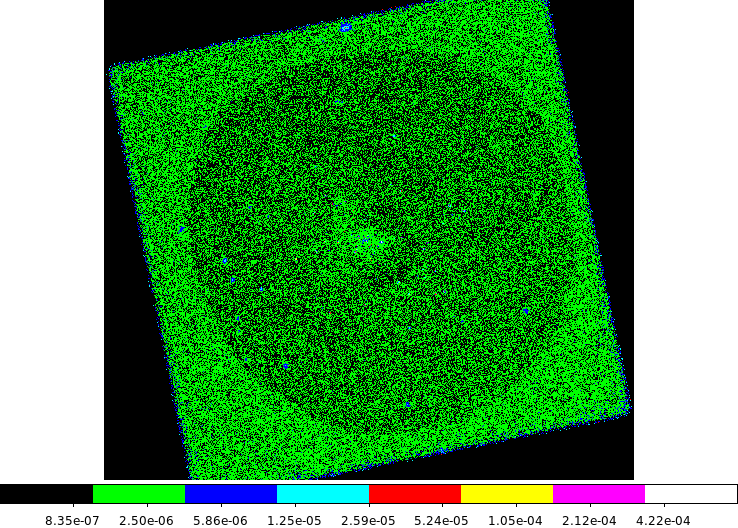

In [23]:
ds9 rings/all_flux.img -scale log -cmap i8 -saveimage png rings.png &
sleep 10
xpaset -p ds9 quit

display < rings.png

# Cleanup

In [24]:
mv -fv rings/all* ./
/bin/rm -rf 6202 repro rings


'rings/all_flux.img' -> './all_flux.img'
'rings/all_thresh.expmap' -> './all_thresh.expmap'
'rings/all_thresh.img' -> './all_thresh.img'
